 #  二维稳态导热的数值计算

## 问题描述
   
一矩形区域，假设区域内无内热源，导热系数为常数，三个边温度为 T1=0，一个边温度为 T2=1，求该矩形区域内的温度分布。

## 求解过程：

建立节点物理量的代数方程，即离散方程，边界节点由第一类边界条件赋予已知的温度值，而内部节点通过建立内节点离散方程进行求解。

以节点（m,n）的代数方程为例：

$ t_{m,n}= \frac{1}{4}*( t_{m+1,n}+ t_{m-1,n}+ t_{m,n+1}+ t_{m,n-1}) $

可用Gauss-Seidel迭代法进行求解节点差分方程。

$ t_{m,n}^{i+1}= \frac{1}{4}*(t_{m-1,n}^{i}+ t_{m+1,n}^{i} + t_{m,n-1}^{i}+ t_{m,n+1}^{i}) $

$ t_{m+1,n}^{i+1}= \frac{1}{4}*(t_{m,n}^{i}+ t_{m+2,n}^{i} + t_{m,n-1}^{i}+ t_{m,n+1}^{i}) $


每次计算均用前一次t的最新值计算，重复迭代循环。

实现代码:



[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [1, 1, 1, 1, 1]]
[[0, 0, 0, 0, 0], [0, 0.07142855280211993, 0.0982142670878342, 0.07142856211534568, 0], [0, 0.1874999813735485, 0.2499999813735485, 0.18749999068677425, 0], [0, 0.42857141925820286, 0.5267857049724886, 0.42857142391481573, 0], [1, 1, 1, 1, 1]]


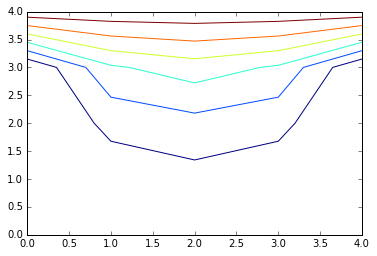

In [3]:
# -*- coding: UTF-8 -*-
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
n=5
a=list(range(n*n))
g=iter(a)
res=[[next(g) for _ in range(n)] for _ in range(n)]
for i in range(n-1):
    for j in range(n-1):
        res[i][j]=0

for k in range(n-1):    #给左侧边界节点赋予条件初始温度
    res[k][0]=0
for k in range(n-1):    #给右侧边界节点赋予条件初始温度
    res[k][n-1]=0
for k in range(1,n):    #给上侧边界节点赋予条件初始温度
    res[0][k]=0
for k in range(1,n):    #给下侧边界节点赋予条件初始温度
    res[n-1][k]=1    
res[n-1][0]=1
print(res)   
for i in range(n+20):  #迭代循环进行的最大次数
    for j in range(1,n-1):
        for k in range(1,n-1):
            res[j][k]=0.25*(res[j+1][k]+res[j-1][k]+res[j][k+1]+res[j][k-1])#迭代循环的离散方程
print(res)

plt.contour(res) #绘制等值温度分布图线
plt.show()   

## 结果分析

由图可以看出，对于数值求解问题，当在一定范围内所选取的节点数越多，迭代循环的次数越多，所得结果越精确，绘制的曲线越圆滑。